In [3]:
import yfinance as yf
import pandas as pd

In [4]:
sp = yf.Ticker('^GSPC')
sp = sp.history(period='max')
sp

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-02 00:00:00-04:00,5204.290039,5208.339844,5184.049805,5205.810059,3886590000,0.0,0.0
2024-04-03 00:00:00-04:00,5194.370117,5228.750000,5194.370117,5211.490234,3703250000,0.0,0.0
2024-04-04 00:00:00-04:00,5244.049805,5256.589844,5146.060059,5147.209961,4075680000,0.0,0.0


In [5]:
sp.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-03-25 00:00:00-04:00', '2024-03-26 00:00:00-04:00',
               '2024-03-27 00:00:00-04:00', '2024-03-28 00:00:00-04:00',
               '2024-04-01 00:00:00-04:00', '2024-04-02 00:00:00-04:00',
               '2024-04-03 00:00:00-04:00', '2024-04-04 00:00:00-04:00',
               '2024-04-05 00:00:00-04:00', '2024-04-08 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24182, freq=None)

In [6]:
sp.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

<Axes: xlabel='Date'>

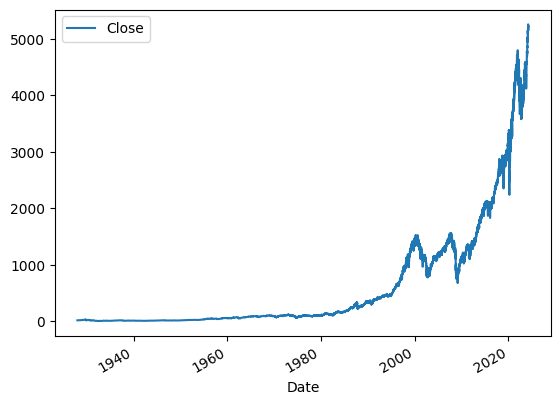

In [7]:
sp.plot.line(y='Close', use_index = True)

In [8]:
del sp['Dividends']
del sp['Stock Splits']


In [9]:
sp['Tomorrow'] = sp['Close'].shift(-1)


In [14]:

sp['Target'] = (sp['Tomorrow'] > sp['Close']).astype(int)

In [15]:
sp.head(2)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.66,17.66,17.66,17.66,0,17.760000,1
1928-01-03 00:00:00-05:00,17.76,17.76,17.76,17.76,0,17.719999,0


In [17]:
# Remove historical data to 1990

sp = sp.loc['1990-01-01':].copy()
sp

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-04-02 00:00:00-04:00,5204.290039,5208.339844,5184.049805,5205.810059,3886590000,5211.490234,1
2024-04-03 00:00:00-04:00,5194.370117,5228.750000,5194.370117,5211.490234,3703250000,5147.209961,0
2024-04-04 00:00:00-04:00,5244.049805,5256.589844,5146.060059,5147.209961,4075680000,5204.339844,1


In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100,random_state=1)
train = sp.iloc[:-100]
test = sp.iloc[-100:]

predictors = ['Close', 'Volume', 'Open', 'High']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [23]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [24]:
preds = pd.Series(preds,index=test.index)

In [25]:
preds

Date
2023-11-13 00:00:00-05:00    0
2023-11-14 00:00:00-05:00    0
2023-11-15 00:00:00-05:00    0
2023-11-16 00:00:00-05:00    0
2023-11-17 00:00:00-05:00    0
                            ..
2024-04-02 00:00:00-04:00    0
2024-04-03 00:00:00-04:00    0
2024-04-04 00:00:00-04:00    0
2024-04-05 00:00:00-04:00    0
2024-04-08 00:00:00-04:00    0
Length: 100, dtype: int32

In [26]:
precision_score(test['Target'], preds)

0.5714285714285714

<Axes: xlabel='Date'>

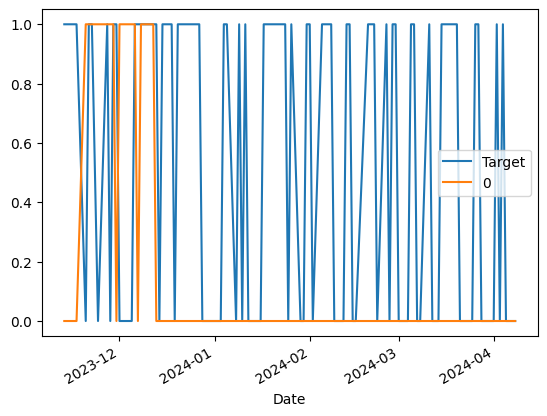

In [27]:
combined = pd.concat([test['Target'],preds], axis=1)

combined.plot()

### Revamp the Prediction Model

In [29]:
def predict(train, test, predictors, model):
    model.fit(train[predictors],train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined


In [30]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)


In [31]:
predictions = backtest(sp, model, predictors)

<Axes: xlabel='Predictions'>

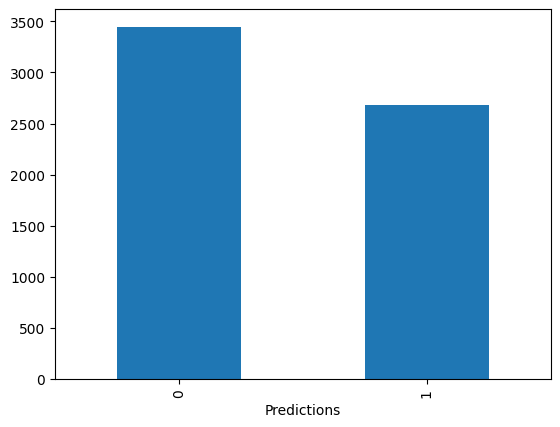

In [35]:
predictions['Predictions'].value_counts().plot.bar()

In [34]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5262569832402234

In [39]:
predictions.Target.value_counts() / predictions.shape[0]

Target
1    0.534573
0    0.465427
Name: count, dtype: float64